In [1]:
import pandas as pd
import numpy as np

In [2]:
tabla = pd.DataFrame({
    'year':[1,2,3],
    'rendimiento':[0.20,-0.10,0.15]
})
tabla

,year,rendimiento
0,1,0.20
1,2,-0.10
2,3,0.15


In [3]:
(1 + tabla.rendimiento).prod()-1

0.242

In [4]:
# Creamos tabla
tabla2 = pd.DataFrame(columns=['prob','ret'], 
                      index=['recesion', 'normalidad', 'expansiion'])
tabla2.index.name = 'state'
tabla2['prob'] = [0.40,0.30,0.30]
tabla2['ret'] = [-0.10,0.08,0.23]
tabla2

,prob,ret
state,,
recesion,0.4,-0.10
normalidad,0.3,0.08
expansiion,0.3,0.23


In [5]:
valor_esperado=(tabla2['prob'] * tabla2['ret']).sum()
valor_esperado

0.053

In [6]:
varianza = np.sum(tabla2.prob * (-valor_esperado+tabla2.ret)**2)
volatilidad = np.sqrt(varianza)
round(volatilidad,3)

0.138

In [7]:
rt = pd.DataFrame({'r': [-0.07, 0.04, 0.1, -0.08, 0.15]})
rt

,r
0,-0.07
1,0.04
2,0.10
3,-0.08
4,0.15


In [8]:
rg = (1+rt['r']).prod()**(1/len(rt))-1
round(rg,3)

0.024

In [9]:
round((1 + rt.r).prod(),3)

1.126

In [10]:
rt['prob']=0.20
rt

,r,prob
0,-0.07,0.2
1,0.04,0.2
2,0.10,0.2
3,-0.08,0.2
4,0.15,0.2


In [11]:
ve=(rt['r'] * rt['prob']).sum()
round(ve,3)

0.028

In [12]:
varianza = np.sum(rt.prob * (-ve+rt.r)**2)
volatilidad = np.sqrt(varianza)
round(volatilidad,3)

0.091

In [13]:
v=0.2 * (ve+0.07)**2 + 0.2 * (ve-0.04)**2 +0.2 * (ve-0.10)**2 +0.2 * (ve+0.08)**2 +0.2 * (ve-0.15)**2 
round(np.sqrt(v),3)

0.091

In [14]:
import yfinance as yf
import numpy as np

tickers = ['^GSPC']
start_date = '1900-01-01'
end_date = '2023-12-31'
df = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
df = df.resample('Y').last()
rt = df.pct_change()
rt

[*********************100%%**********************]  1 of 1 completed


Date
1927-12-31         NaN
1928-12-31    0.378822
1929-12-31   -0.119096
1930-12-31   -0.284849
1931-12-31   -0.470665
                ...   
2019-12-31    0.288781
2020-12-31    0.162589
2021-12-31    0.268927
2022-12-31   -0.194428
2023-12-31    0.242305
Freq: A-DEC, Name: Adj Close, Length: 97, dtype: float64

In [15]:
rt = rt.dropna()
rt

Date
1928-12-31    0.378822
1929-12-31   -0.119096
1930-12-31   -0.284849
1931-12-31   -0.470665
1932-12-31   -0.147783
                ...   
2019-12-31    0.288781
2020-12-31    0.162589
2021-12-31    0.268927
2022-12-31   -0.194428
2023-12-31    0.242305
Freq: A-DEC, Name: Adj Close, Length: 96, dtype: float64

In [16]:
round((1 + rt).prod()-1,3)

269.092

In [17]:
import numpy as np
rg = (1+rt).prod()**(1/len(df))-1
np.round(rg,3)

0.059

In [18]:
round((1+rg)**(len(rt))-1,3)

253.944

In [19]:
round(df.iloc[-1]/df.iloc[0]-1,3)

269.092

In [20]:
round(rt.describe(),3)

count    96.000
mean      0.079
std       0.191
min      -0.471
25%      -0.054
50%       0.111
75%       0.220
max       0.450
Name: Adj Close, dtype: float64

In [21]:
round(rt.mean(),3)

0.079

In [22]:
round(rt.median(),3)

0.111

<Axes: >

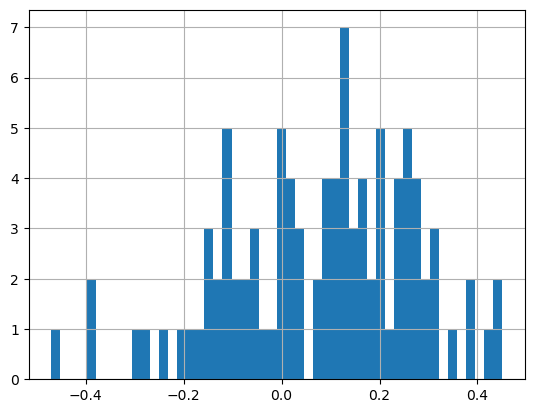

In [23]:
rt.hist(bins=50)

In [25]:
np.mean(rt < 0)

0.3229166666666667

<Axes: xlabel='Date'>

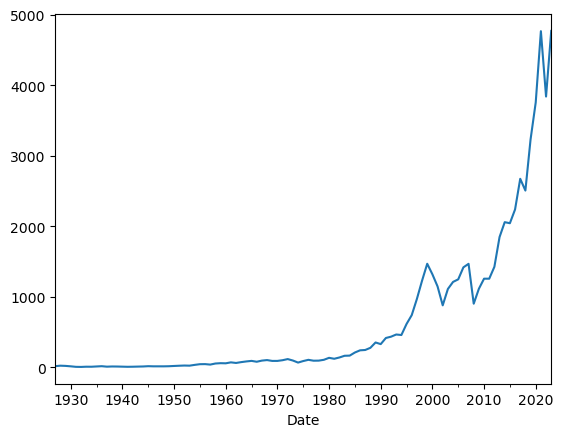

In [24]:
df.plot()